In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# データ読み込み
data_path = Path("../../data/raw/assistments_2009_2010/skill_builder_data.csv")
df = pd.read_csv(data_path, encoding='latin1')

print("=== データ形状 ===")
print(f"行数: {len(df)}")
print(f"列数: {len(df.columns)}")
print()

# カラム一覧と型
print("=== カラム一覧 ===")
print(df.dtypes)
print()

# 基本統計量
print("=== 基本情報 ===")
df.info()
print()

# 最初の数行を表示
print("=== データサンプル ===")
display(df.head(10))

/var/folders/zg/773ptkr55z99zw26dvy19_v00000gn/T/ipykernel_50127/1335495223.py:9: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, encoding='latin1')


=== データ形状 ===
行数: 525534
列数: 30

=== カラム一覧 ===
order_id                  int64
assignment_id             int64
user_id                   int64
assistment_id             int64
problem_id                int64
original                  int64
correct                   int64
attempt_count             int64
ms_first_response         int64
tutor_mode               object
answer_type              object
sequence_id               int64
student_class_id          int64
position                  int64
type                     object
base_sequence_id          int64
skill_id                float64
skill_name               object
teacher_id                int64
school_id                 int64
hint_count                int64
hint_total                int64
overlap_time              int64
template_id               int64
answer_id               float64
answer_text              object
first_action              int64
bottom_hint             float64
opportunity               int64
opportunity_original    f

,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
0,33022537,277618,64525,33139,51424,1,1,1,32454,tutor,...,0,3,32454,30799,NaN,26,0,NaN,1,1.0
1,33022709,277618,64525,33150,51435,1,1,1,4922,tutor,...,0,3,4922,30799,NaN,55,0,NaN,2,2.0
2,35450204,220674,70363,33159,51444,1,0,2,25390,tutor,...,0,3,42000,30799,NaN,88,0,NaN,1,1.0
3,35450295,220674,70363,33110,51395,1,1,1,4859,tutor,...,0,3,4859,30059,NaN,41,0,NaN,2,2.0
4,35450311,220674,70363,33196,51481,1,0,14,19813,tutor,...,3,4,124564,30060,NaN,65,0,0.0,3,3.0
5,35450555,220674,70363,33172,51457,1,1,1,16031,tutor,...,0,4,16031,30060,NaN,12,0,NaN,4,4.0
6,35450573,220674,70363,33174,51459,1,1,1,15047,tutor,...,0,4,15047,30060,NaN,6,0,NaN,5,5.0
7,35480603,220674,70363,33123,51408,1,1,1,10732,tutor,...,0,3,10732,30059,NaN,55,0,NaN,6,6.0
8,33140811,220674,70677,33168,51453,1,1,1,23241,tutor,...,0,4,23241,30060,NaN,12,0,NaN,1,1.0
9,33140919,220674,70677,33112,51397,1,1,1,11512,tutor,...,0,2,11512,30059,NaN,36,0,NaN,2,2.0


In [2]:
# 欠損値の確認
print("=== 欠損値の数 ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    '欠損数': missing,
    '欠損率(%)': missing_pct
}).sort_values('欠損数', ascending=False)
display(missing_df[missing_df['欠損数'] > 0])

=== 欠損値の数 ===


,欠損数,欠損率(%)
answer_id,476856,90.737421
bottom_hint,445627,84.795085
answer_text,94784,18.035750
skill_name,78690,14.973341
opportunity_original,76314,14.521230
skill_id,66326,12.620687


In [3]:
# ユニークなユーザー数とスキル数
print("=== ユニーク数 ===")
print(f"ユニークなuser_id数: {df['user_id'].nunique()}")
print(f"ユニークなskill_id数: {df['skill_id'].nunique()}")
print(f"ユニークなproblem_id数: {df['problem_id'].nunique() if 'problem_id' in df.columns else 'N/A'}")

=== ユニーク数 ===
ユニークなuser_id数: 4217
ユニークなskill_id数: 123
ユニークなproblem_id数: 26688


In [10]:
# ユニークなskill_name一覧
if 'skill_name' in df.columns:
    unique_skills = df['skill_name'].dropna().unique()
    print(f"=== Unique Skill Names (Total: {len(unique_skills)}) ===")
    for i, skill in enumerate(sorted(unique_skills), 1):
        print(f"{i}. {skill}")
else:
    print("Column 'skill_name' not found in the dataset")
    print(f"Available columns: {df.columns.tolist()}")

=== Unique Skill Names (Total: 110) ===
1. Absolute Value
2. Addition Whole Numbers
3. Addition and Subtraction Fractions
4. Addition and Subtraction Integers
5. Addition and Subtraction Positive Decimals
6. Algebraic Simplification
7. Algebraic Solving
8. Angles - Obtuse, Acute, and Right
9. Angles on Parallel Lines Cut by a Transversal
10. Area Circle
11. Area Irregular Figure
12. Area Parallelogram
13. Area Rectangle
14. Area Trapezoid
15. Area Triangle
16. Box and Whisker
17. Calculations with Similar Figures
18. Choose an Equation from Given Information
19. Circle Graph
20. Circumference 
21. Complementary and Supplementary Angles
22. Computation with Real Numbers
23. Congruence
24. Conversion of Fraction Decimals Percents
25. Counting Methods
26. D.4.8-understanding-concept-of-probabilities
27. Distributive Property
28. Divisibility Rules
29. Division Fractions
30. Effect of Changing Dimensions of a Shape Prportionally
31. Equation Solving More Than Two Steps
32. Equation Solving

In [4]:
# skill_idごとのユーザー数分布
print("=== skill_idごとのユーザー数 ===")

# skill_idがNaNでない行のみ抽出
df_skill = df[df['skill_id'].notna()].copy()

# skill_idごとにユニークなユーザー数をカウント
skill_user_counts = df_skill.groupby('skill_id')['user_id'].nunique().reset_index()
skill_user_counts.columns = ['skill_id', 'n_users']

# 問題数もカウント
skill_problem_counts = df_skill.groupby('skill_id').size().reset_index()
skill_problem_counts.columns = ['skill_id', 'n_problems']

# 統合
skill_stats = skill_user_counts.merge(skill_problem_counts, on='skill_id')
skill_stats = skill_stats.sort_values('n_users', ascending=False)

print(f"\nスキル数: {len(skill_stats)}")
print("\n=== ユーザー数の統計量 ===")
print(skill_stats['n_users'].describe())

print("\n=== ユーザー数TOP 20のスキル ===")
display(skill_stats.head(20))

=== skill_idごとのユーザー数 ===

スキル数: 123

=== ユーザー数の統計量 ===
count     123.000000
mean      341.317073
std       316.460816
min         1.000000
25%        87.500000
50%       264.000000
75%       475.000000
max      1353.000000
Name: n_users, dtype: float64

=== ユーザー数TOP 20のスキル ===


,skill_id,n_users,n_problems
82,280.0,1353,11334
79,277.0,1226,22895
30,47.0,1225,20992
44,70.0,1115,22931
55,85.0,1000,7217
37,58.0,988,4737
98,311.0,961,24253
32,49.0,942,7317
14,18.0,939,7438
45,74.0,903,7700


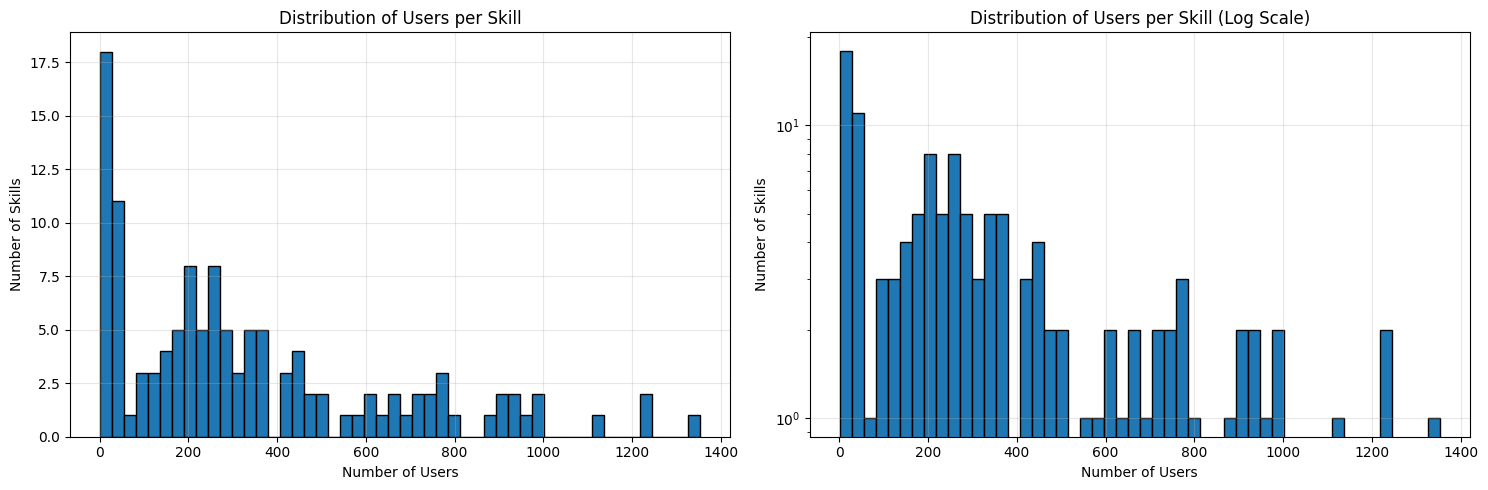

In [5]:
# ユーザー数分布のヒストグラム
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 全体分布
axes[0].hist(skill_stats['n_users'], bins=50, edgecolor='black')
axes[0].set_xlabel('Number of Users')
axes[0].set_ylabel('Number of Skills')
axes[0].set_title('Distribution of Users per Skill')
axes[0].grid(True, alpha=0.3)

# 対数スケール
axes[1].hist(skill_stats['n_users'], bins=50, edgecolor='black')
axes[1].set_xlabel('Number of Users')
axes[1].set_ylabel('Number of Skills')
axes[1].set_title('Distribution of Users per Skill (Log Scale)')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
# ユーザー数でフィルタリング候補を提示
print("=== フィルタリング候補 ===")
for threshold in [100, 200, 500, 1000]:
    n_skills = len(skill_stats[skill_stats['n_users'] >= threshold])
    print(f"ユーザー数 >= {threshold}: {n_skills}スキル")

=== フィルタリング候補 ===
ユーザー数 >= 100: 90スキル
ユーザー数 >= 200: 75スキル
ユーザー数 >= 500: 29スキル
ユーザー数 >= 1000: 5スキル


In [7]:
# 代表的なスキルの抽出（例: ユーザー数が多いスキル）
# 閾値を調整してください
MIN_USERS = 500  # 最小ユーザー数

selected_skills = skill_stats[skill_stats['n_users'] >= MIN_USERS].copy()
print(f"\n=== 抽出されたスキル（ユーザー数>={MIN_USERS}）===")
print(f"抽出スキル数: {len(selected_skills)}")
display(selected_skills)

# 抽出したスキルIDのリスト
selected_skill_ids = selected_skills['skill_id'].tolist()
print(f"\n抽出されたskill_id: {selected_skill_ids[:10]}...")  # 最初の10個を表示


=== 抽出されたスキル（ユーザー数>=500）===
抽出スキル数: 29


,skill_id,n_users,n_problems
82,280.0,1353,11334
79,277.0,1226,22895
30,47.0,1225,20992
44,70.0,1115,22931
55,85.0,1000,7217
37,58.0,988,4737
98,311.0,961,24253
32,49.0,942,7317
14,18.0,939,7438
45,74.0,903,7700



抽出されたskill_id: [280.0, 277.0, 47.0, 70.0, 85.0, 58.0, 311.0, 49.0, 18.0, 74.0]...


In [8]:
# 選択したスキルに関するデータを抽出
df_selected = df[df['skill_id'].isin(selected_skill_ids)].copy()

print("=== 抽出後のデータ統計 ===")
print(f"総レコード数: {len(df_selected)}")
print(f"ユニークなユーザー数: {df_selected['user_id'].nunique()}")
print(f"ユニークなスキル数: {df_selected['skill_id'].nunique()}")
print(f"ユニークな問題数: {df_selected['problem_id'].nunique() if 'problem_id' in df_selected.columns else 'N/A'}")

=== 抽出後のデータ統計 ===
総レコード数: 255033
ユニークなユーザー数: 3905
ユニークなスキル数: 29
ユニークな問題数: 8775



=== Number of Problems per User ===
count    3905.000000
mean       65.309347
std       176.539878
min         1.000000
25%         9.000000
50%        22.000000
75%        66.000000
max      6157.000000
dtype: float64


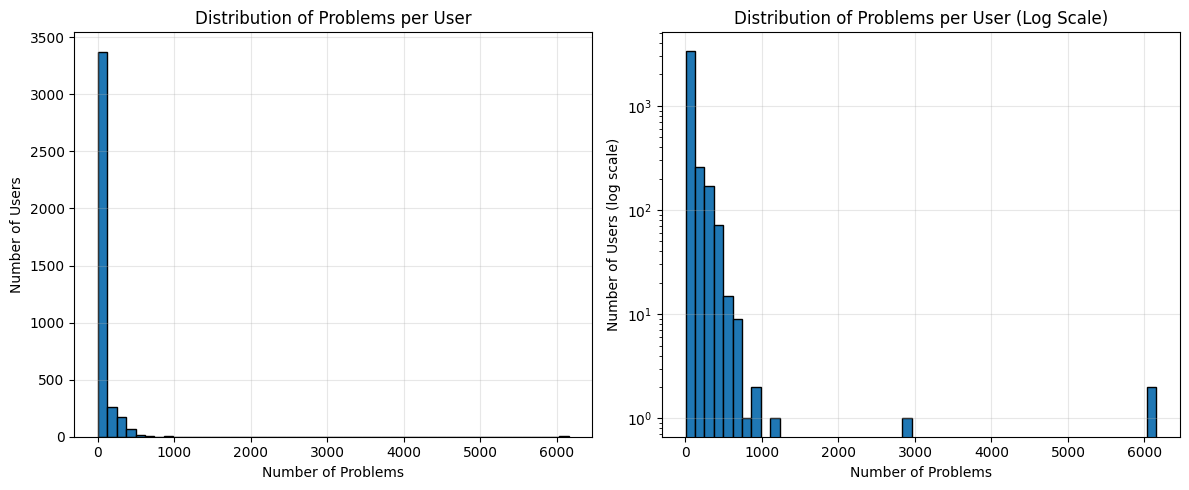

In [9]:
# ユーザーごとの問題数分布
user_problem_counts = df_selected.groupby('user_id').size()

print("\n=== Number of Problems per User ===")
print(user_problem_counts.describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(user_problem_counts, bins=50, edgecolor='black')
plt.xlabel('Number of Problems')
plt.ylabel('Number of Users')
plt.title('Distribution of Problems per User')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(user_problem_counts, bins=50, edgecolor='black')
plt.xlabel('Number of Problems')
plt.ylabel('Number of Users (log scale)')
plt.title('Distribution of Problems per User (Log Scale)')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()